In [4]:
import pandas as pd

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
cd ..

/Users/luke/Code/ml-projects/ml-from-scratch


In [41]:
df = pd.read_csv("data/iris.csv.xls")

In [42]:
petal_df = df[['petal_length', 'petal_width', 'species']]

In [43]:
import matplotlib.pyplot as plt

In [44]:
def map_color(species):
    if species == "Iris-setosa":
        return 'red'
    elif species == 'Iris-versicolor':
        return 'blue'
    else:
        return 'black'

colors = list(map(map_color, petal_df['species']))

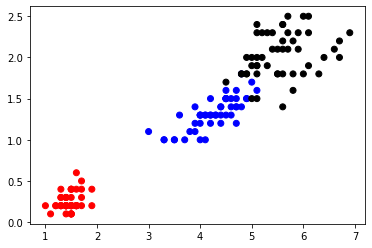

In [45]:
plt.scatter(x=petal_df['petal_length'], y=petal_df['petal_width'], c=colors)

In [46]:
binary_df = df[df['species'].isin(['Iris-setosa', "Iris-versicolor"])]

In [47]:
binary_df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor'], dtype=object)

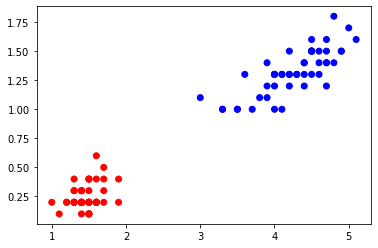

In [48]:
colors = list(map(map_color, binary_df['species']))
plt.scatter(x=binary_df['petal_length'], y=binary_df['petal_width'], c=colors)

In [49]:
data = binary_df[['petal_length', 'petal_width']].to_numpy()

In [50]:
is_setosa = binary_df["species"] == "Iris-setosa"
values = is_setosa.astype(int)

In [51]:
values

0     1
1     1
2     1
3     1
4     1
     ..
95    0
96    0
97    0
98    0
99    0
Name: species, Length: 100, dtype: int64

In [52]:
from algorithms.perceptron.core import Hyperparameters, Model, train
import numpy as np

In [53]:
initial_model = Model(bias=0.0, weights=np.array([0.0, 0.0]), labels=("versicolor", "setosa"))
hyperparameters = Hyperparameters(learning_rate=0.01, initial_model=initial_model, epochs=100, tolerance=0.001)

In [54]:
solution = train(data, values, hyperparameters)

In [55]:
model = solution.model

In [56]:
x_min, x_max = 0, 6
y_min, y_max = 0, 2

In [57]:
x_range = np.arange(x_min, x_max, 0.1)
y_range = np.arange(y_min, y_max, 0.1)
X, Y = np.meshgrid(x_range, y_range)
pairs = np.dstack([X, Y]).reshape(-1, 2)
pairs

array([[0. , 0. ],
       [0.1, 0. ],
       [0.2, 0. ],
       ...,
       [5.7, 1.9],
       [5.8, 1.9],
       [5.9, 1.9]])

In [58]:
pairs.shape

(1200, 2)

In [59]:
model.weights.shape

(2,)

In [60]:
outputs = model.outputs(pairs)

In [61]:
def map_class_color(output):
    if output == 1:
        return 'red'
    elif output == 0:
        return 'blue'

colors = list(map(map_class_color, outputs))

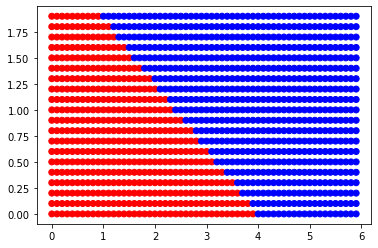

In [62]:
plt.scatter(x=pairs[:, 0], y=pairs[:, 1], c=colors)